In [1]:
import matplotlib.pyplot as plt
from filtered_gencode_evlauator import GencodeSpliceSiteEvaluator

In [2]:
# Initialize evaluator with 10kb window
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="/data/Splice/data/gencode.v47.basic.annotation.gtf",
    fasta_file="/data/genomes/hg38/hg38.fa",
    window_size=3
)

# Generate ground truth and load windowed predictions
acceptor_truth, donor_truth = evaluator.parse_gencode()
acceptor_pred, donor_pred = evaluator.load_predictions(
    "acceptor_predictions.pkl",
    "donor_predictions.pkl"
)

In [3]:
# Calculate metrics
acc_precision, acc_recall, acc_auprc = evaluator.calculate_metrics(acceptor_truth, acceptor_pred)
don_precision, don_recall, don_auprc = evaluator.calculate_metrics(donor_truth, donor_pred)

print(f"Acceptor AUPRC: {acc_auprc:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}")
print(f"Mean AUPRC: {(acc_auprc + don_auprc) / 2:.4f}")

Acceptor AUPRC: 0.8151
Donor AUPRC: 0.8101
Mean AUPRC: 0.8126


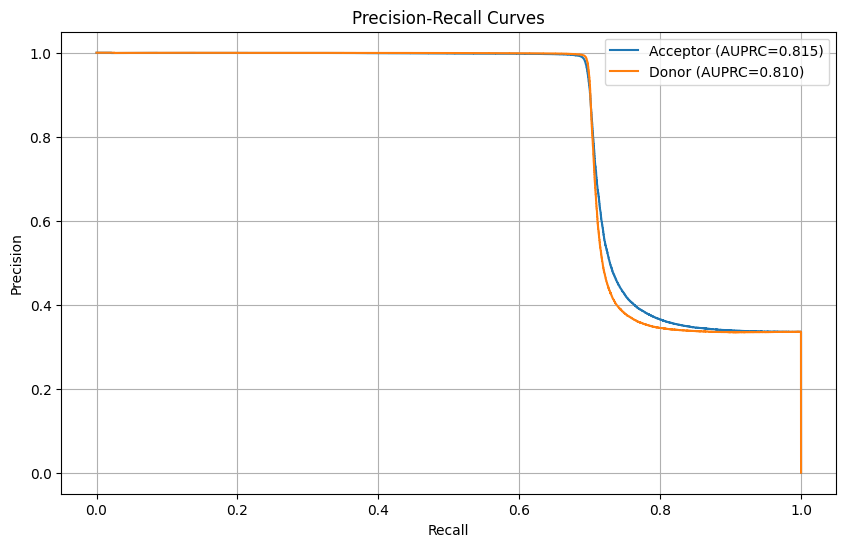

In [4]:
# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()